In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(x_p: np.array,
          w: np.array) -> float:
    return w[0] + np.dot(x_p,w[1:,])

def g(w: np.array,
      x: np.array,
      y: np.array,) -> float:
    cost = 0
    P = y.size
    for p in range(P):
        cost += (model(x[p],w) - y[p]) ** 2
    cost /= P
    return cost

def gradient(w,X,Y) -> np.array:
    N = 2
    P = np.size(X)
    grad = np.zeros(N)
    for p in range(P):
        grad = grad + (model(X[p],w) - Y[p]) * [1,X[p]]
    grad = 2 * grad/P
    return np.array(grad)


def gradient_desc(w: np.array,
                  X: np.array,
                  Y: np.array,
                  max_its: int = 1000,
                  alpha: float = 10,
                  tolerance: float = 1e-7) -> np.array: 
    result = w.copy()
    cost = g(result,X,Y) # Custo da estimativa inicial
    for k in range(max_its):
        result_ant = result
        grad_eval = gradient(result,X,Y)
        result = result - alpha * grad_eval
        cost_ant = cost
        cost = g(result,X,Y)
        if abs(cost) < tolerance: break
        if cost > cost_ant:
            result = result_ant # Volta passo
            alpha = alpha/2
            # print('alpha=',alpha)
    print(f"Fim do gradiente => w={result}, c={cost}, {k+1} iteracoes")
    return result


In [18]:
def rmsprop(w: np.array,
            X: np.array,
            Y: np.array,
            gamma: float = 0.9,
            max_its: int = 1000,
            alpha: float = 1e-2,
            tolerance: float = 1e-7) -> np.array:
    
    result = w.copy()
    cost = g(result, X, Y) # Custo da estimativa inicial

    h = 0

    for k in range(max_its):
        result_ant = result
        h_ant = h
        grad_eval = gradient(result, X, Y)

        h = gamma * h_ant + (1 - gamma) * grad_eval ** 2

        # Computa novo passo com exponential average e normalização
        cost_ant = cost
        result = result - alpha * grad_eval / (h ** 0.5)
        cost = g(result, X, Y)

        if abs(cost) < tolerance: break
        if cost > cost_ant:
            result = result_ant # Volta passo
            alpha = alpha / 2
            # print('alpha=',alpha)

    print(f"Fim do gradiente => w={result}, c={cost}, {k+1} iteracoes")
    return result


def denormalize(vector: np.array):
    vector[1] = vector[1] / 10
    vector[0] = vector[0] - 2004 * vector[1]
    print(vector)

#%%


filename = "student_debt.csv"
data = np.loadtxt(filename,delimiter=',')
X,Y = data
X = (X-2004)/10

P = X.size
A = np.array([np.ones(P),X])
A = A.transpose()
M = np.matmul(A.transpose(),A)
b = np.matmul(A.transpose(),Y)
v = np.linalg.solve(M,b)

w_inicial = np.array([3,2])
results = {}
results['MSE solution'] = v
results['Gradient Descent (1000)'] = gradient_desc(w_inicial, X, Y, 1000, 1e-2, 1e-6)
results['RMSProp (0.9, 250)'] =  rmsprop(w_inicial, X, Y, 0.9, 250,  1e-2, 1e-6)
results['RMSProp (0.9, 300)'] =  rmsprop(w_inicial, X, Y, 0.9, 300,  1e-2, 1e-6)
results['RMSProp (0.9, 350)'] =  rmsprop(w_inicial, X, Y, 0.9, 350,  1e-2, 1e-6)
results['RMSProp (0.9, 1000)'] = rmsprop(w_inicial, X, Y, 0.9, 1000, 1e-2, 1e-6)

print(results)


Fim do gradiente => w=[0.27723281 0.7373094 ], c=[0.00055125], 1000 iteracoes
Fim do gradiente => w=[ 0.73576301 -0.00569787], c=[0.06118609], 250 iteracoes
Fim do gradiente => w=[0.42911267 0.46164834], c=[0.0100849], 300 iteracoes
Fim do gradiente => w=[0.25047383 0.78555588], c=[0.00020926], 350 iteracoes
Fim do gradiente => w=[0.24108736 0.80324417], c=[0.00018306], 1000 iteracoes
{'MSE solution': array([0.24108736, 0.80324417]), 'Gradient Descent (1000)': array([0.27723281, 0.7373094 ]), 'RMSProp (0.9, 100)': array([ 0.73576301, -0.00569787]), 'RMSProp (0.9, 200)': array([0.42911267, 0.46164834]), 'RMSProp (0.9, 300)': array([0.25047383, 0.78555588]), 'RMSProp (0.9, 1000)': array([0.24108736, 0.80324417])}


[-1.76826059e+02  8.03244175e-03]
[-1.62255251e+02  7.37309399e-03]
[ 1.99180215e+00 -5.69787308e-05]
[-1.01336647e+02  4.61648340e-03]
[-1.72917464e+02  7.85555880e-03]
[-1.76826058e+02  8.03244171e-03]


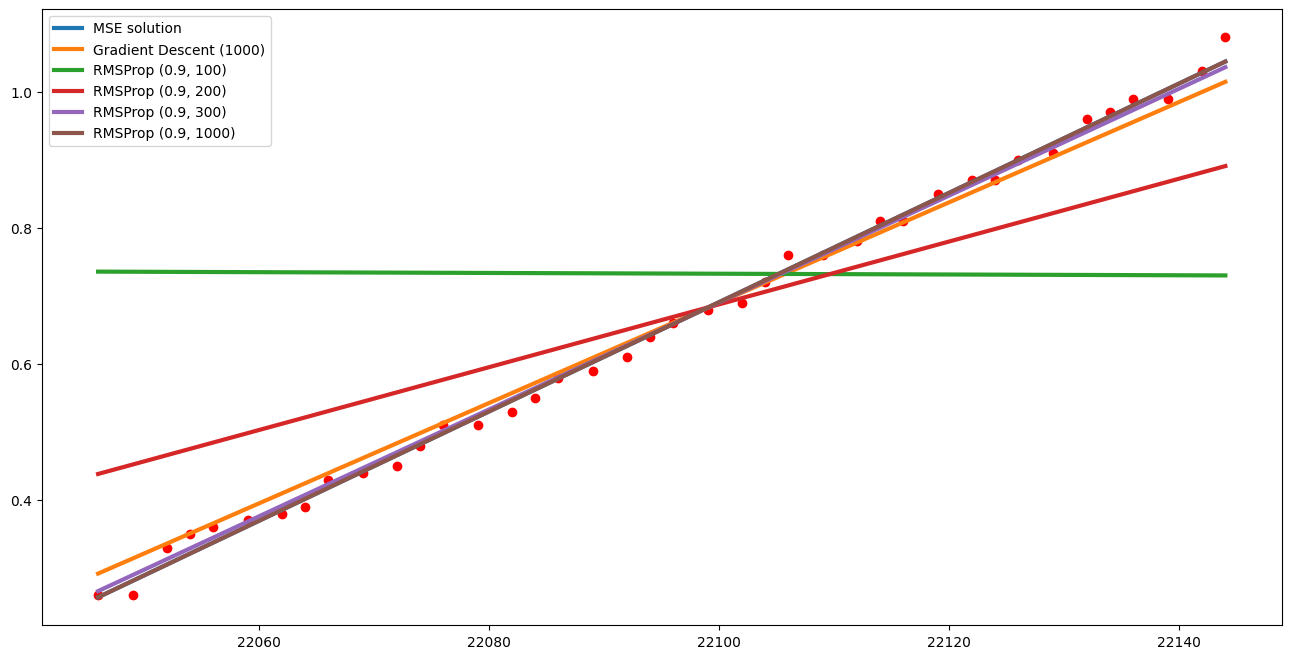

In [20]:
X = 10*X+2004
plt.figure(figsize = (16, 8))
plt.scatter(X, Y, c = 'red')
x = np.linspace(X[0], X[-1], 100)
for legend, result in results.items():
    denormalize(result)
    y = result[1] * x + result[0]
    plt.plot(x, y, label=legend, linewidth=3)
# plt.plot(x, yv, 'g')
plt.legend()
plt.show()